In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compress import *

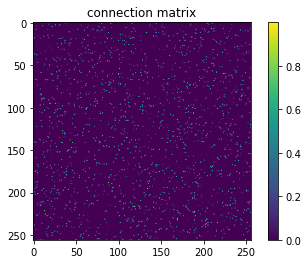

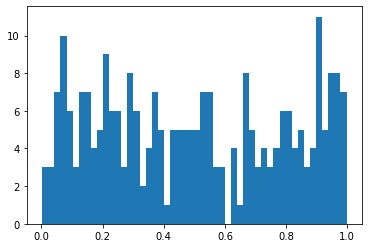

In [21]:
no_neurons = 256
def get_M(no_neurons=256,sparsity=0.7,local=False):
    M = (np.random.random((no_neurons,no_neurons))>sparsity).astype(np.float64)
    M *= np.random.random((no_neurons,no_neurons))
    if local: 
        A = np.arange(no_neurons**2).reshape(no_neurons,no_neurons)
        x = (A//no_neurons)/no_neurons
        y = (A%no_neurons)/no_neurons
        locality = 1.-np.abs(x-y)**0.2
        M *= locality
    return M
M = get_M(no_neurons,sparsity=0.97)


leackage = np.random.random(no_neurons)

plt.imshow(M)
plt.colorbar()
plt.title('connection matrix')
plt.show()

plt.hist(leackage,bins=50)
plt.show()

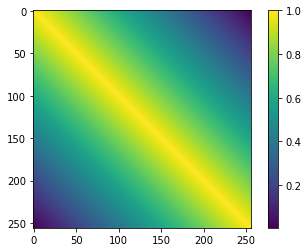

In [22]:
A = np.arange(no_neurons**2).reshape(no_neurons,no_neurons)
x = (A//no_neurons)/no_neurons
y = (A%no_neurons)/no_neurons
plt.imshow(1.-np.abs(x-y))
plt.colorbar()
plt.show()

In [23]:
def firing_function(V,a,b):
    sm = 1./(1+np.exp(-(V-a)*b))
    return np.random.random(V.shape)<sm
    
def integrate(M,leackage,a,b,no_epochs=400):
    no_neurons = M.shape[0]
    voltage = np.zeros((no_epochs,no_neurons))
    activity = np.zeros((no_epochs,no_neurons))
    voltage[0] = np.random.random(no_neurons)
    voltage[5][20] = 1.


    for i in range(1,no_epochs):
        voltage[i] = leackage*voltage[i-1]+M@activity[i-1]
        activity[i] = firing_function(voltage[i],a,b)
        
    return voltage,activity

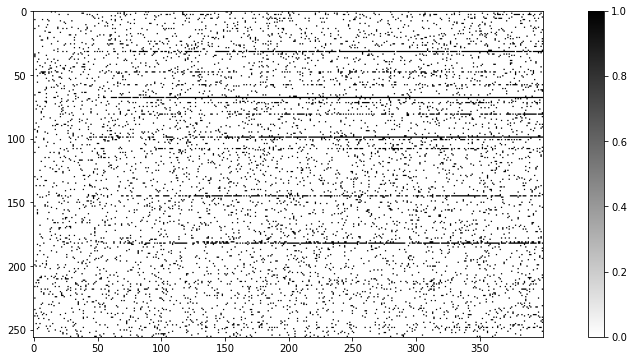

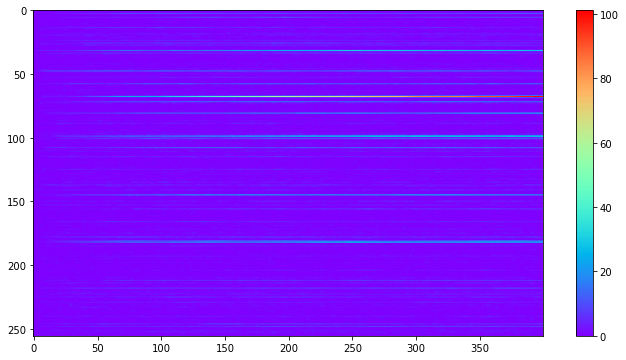

In [24]:
voltage,activity = integrate(M,leackage,15,.2)

fig = plt.figure(figsize=(16,6))
plt.imshow(activity.T,cmap='gray_r')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(12,6))
plt.imshow(voltage.T,cmap='rainbow')
plt.colorbar()
plt.show()

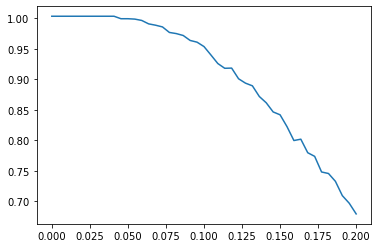

In [25]:
cid_result = []
pictures = False
b_range = np.linspace(0,.2,45)
for b in b_range:
    voltage,activity = integrate(M,leackage,12,b,no_epochs=100)
    final_state = activity.flatten()
    cid_result.append(computable_info_density(final_state))
    
    
    if pictures:
        print('b= '+str(b)+'\t CID='+str(cid_result[-1])) 
        fig = plt.figure(figsize=(12,4))
        plt.imshow(activity.T,cmap='gray_r')
        plt.colorbar()
        plt.show()
plt.plot(b_range,cid_result)
plt.show()

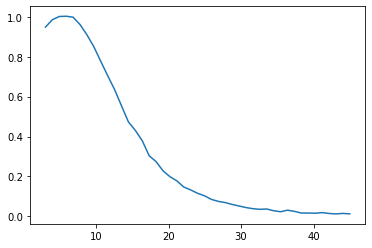

In [26]:
cid_result = []
pictures = False
a_range = np.linspace(3,45,45)
for a in a_range:
    voltage,activity = integrate(M,leackage,a,.2,no_epochs=100)
    final_state = activity.flatten()
    cid_result.append(computable_info_density(final_state))
    
    
    if pictures:
        print('b= '+str(b)+'\t CID='+str(cid_result[-1])) 
        fig = plt.figure(figsize=(12,4))
        plt.imshow(activity.T,cmap='gray_r')
        plt.colorbar()
        plt.show()
plt.plot(a_range,cid_result)
plt.show()

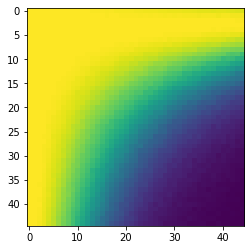

In [27]:
cid_result = np.zeros((a_range.size,b_range.size))
for i,a in enumerate(a_range):
    for j,b in enumerate(b_range):
        voltage,activity = integrate(M,leackage,a,b,no_epochs=100)
        final_state = activity.flatten()
        cid_result[i][j] = computable_info_density(final_state)
        
plt.imshow(cid_result)
plt.show()

In [29]:
sparsity_range = np.linspace(0.85,.99,40)
cid_result = []
for sparsity in sparsity_range:
    M_ = get_M(sparsity=sparsity,no_neurons=256)
    voltage,activity = integrate(M_,leackage,15,.2,no_epochs=100)
    final_state = activity.flatten()
    cid_result.append(computable_info_density(final_state))

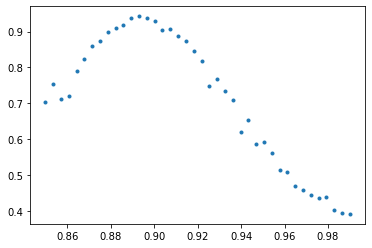

In [30]:
plt.plot(sparsity_range,cid_result,'.')
plt.show()